# Download The Library

In [ ]:
!gdown 1Y1vgzPvMeVcXSxDfOlCVia7wsU7p8M6g -O CIFAR10.tar.gz
!tar xzf CIFAR10.tar.gz

# Reading data

First we load images from files using os library

Then we initialize labels array

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

#function to load images
def load(class_t , number):
    images = []
    labels = []

    for filename in os.listdir(class_t):

            try:
                img = mpimg.imread(os.path.join(class_t, filename))

                if img is not None:
                    images.append(img)
                    labels= create_label(labels,number)

            except:
                print('Cant import ' + filename)
    images = np.asarray(images)
    labels = np.asarray(labels)
    return images,labels


def  create_label(labels,number):
      label=labels
      if number == 1:
          label.append( [1,0,0,0])
	      
      elif number == 2:
          label.append( [0,1,0,0])
      	
      elif number == 3:
          label.append( [0,0,1,0])
      	
      else:
          label.append( [0,0,0,1])
      	

      return label

test_data=[]
train_data=[]

test_label=[]
train_label=[]

class1 = '/content/CIFAR10/train/airplane'
class2 = '/content/CIFAR10/train/automobile'
class3 = '/content/CIFAR10/train/bird'
class4 = '/content/CIFAR10/train/cat'

class1_t = '/content/CIFAR10/test/airplane'
class2_t = '/content/CIFAR10/test/automobile'
class3_t = '/content/CIFAR10/test/bird'
class4_t = '/content/CIFAR10/test/cat'


images1,label1=load(class1,1)
images2,label2=load(class2,2)
images3,label3=load(class3,3)
images4,label4=load(class4,4)


train_data=np.concatenate((images1,images2,images3,images4), axis=0)
train_label=np.concatenate((label1,label2,label3,label4), axis=0)

train_data = np.array(train_data)

images1_1,label1_1=load(class1_t,1)
images2_2,label2_2=load(class2_t,2)
images3_3,label3_3=load(class3_t,3)
images4_4,label4_4=load(class4_t,4)

test_data  = np.concatenate((images1_1,images2_2,images3_3,images4_4), axis=0)
test_label = np.concatenate((label1_1,label2_2,label3_3,label4_4), axis=0)

test_data = np.array(test_data)


# Preprocessing data

First because of simplity of calculations we convert images into gray scales and normalize it to range between 0 and 1

Then we map data from (32,32) to 1024 to send them to our neural network

At last we shuffle our data and our labels simultaneously


In [ ]:
# gray 
def rgb2gray(rgb):
  r, g, b = rgb[:, :, :, 0], rgb[:, :, :,1], rgb[:, :, :, 2]
  gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
  return gray / 255

test_data= rgb2gray(test_data)
train_data=rgb2gray(train_data)


#flat
train_data= train_data.reshape(-1,1024)
test_data= test_data.reshape(-1,1024)

#shuffled
def shuffle_unison(array1, array2):
  shuffler = np.random.permutation(len(array1))
  array1_shuffled = array1[shuffler]
  array2_shuffled = array2[shuffler]
  return array1_shuffled, array2_shuffled


train_data, train_label = shuffle_unison(train_data, train_label)
test_data, test_label = shuffle_unison(test_data, test_label)


# Define functions

In this cell we define some important functions that we use in next cells

Feed forward gets data and returns our output

in this cell for testing our functions we print a output that's from our neural network, but our NN isn't traind and it returnes data with random weights and random biases  

In [ ]:
def sigmoid(x):
    ans = 1 / (1 + np.exp(-x))
    return ans

# creating the matrix of weights randomly and the biases with all zeros.
w0 = np.random.randn(16, 1024)
w1 = np.random.randn(16, 16)
w2 = np.random.randn(4, 16)

b0 = np.zeros((16, 1))
b1 = np.zeros((16, 1))
b2 = np.zeros((4, 1))

#feedforward
minimize_train_set = train_data[:200]
# feedforward for all datas
def feedforward(w0,w1,w2,b0,b1,b2):
  counter = 0
  for i in range(len(minimize_train_set)):

      # label and fetures of one input
      reshape_train = minimize_train_set[i].reshape(-1,1)
    
      # calculate precptron output with activiation sigmoid function
      s0 = reshape_train
      s1 = sigmoid(w0 @ s0 + b0)
      s2 = sigmoid(w1 @ s1 + b1)
      s3 = sigmoid(w2 @ s2 + b2)
    
      # check answer 
      if  np.argmax(s3) == np.argmax(train_label[i],axis=0) :
          counter += 1
 
  print("Prediction is : " + str(counter*100 / 200))
  

feedforward(w0,w1,w2,b0,b1,b2)


Prediction is : 21.5


# Implementing Backpropagation

In this cell we develop backpropagation function with loop

First we merge datal and label for simplity

Our neural network is:

Input Layer: 1024 neurons
Hidden Layer 1: 16 neurons
Hiddden Layer 2: 16 neurons
Output Layer: 4 neurons

In each layer except the input layer, we use sigmoid activation function.

We initilalize bias to 0 and weights to a normal random distribution.

Then we calculate gradients and update our weights and our biases

Accuracy is : 37.5%


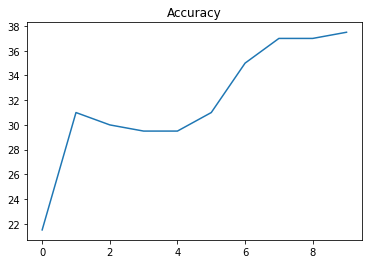

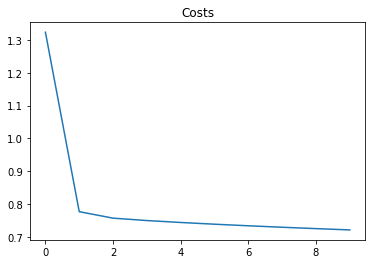

Time : 0:01:45.993142


In [ ]:

from datetime import datetime

start_time = datetime.now()

def merge(data,label):
  mer=[]
  for i in range(label.T.shape[1]):
      mer.append((data.T[:, i].reshape(1024, 1), label.T[:, i].reshape(4, 1)))
  return mer

w0 = np.random.normal(size=(16,1024))
w1 = np.random.normal(size=(16, 16))
w2 = np.random.normal(size=(4, 16))

b0 = np.zeros((16, 1))
b1 = np.zeros((16, 1))
b2 = np.zeros((4, 1))

costs = []
accuracies = []
num_of_train = 200
batch_size = 16
batch_num = 20 // 16
epochs = 10
learning_rate = 0.3

train_set = []
test_set = []

#merge data and label 
train_set = merge(train_data , train_label )
test_set = merge(test_data , test_label)

for epoch in range(epochs):
    all_batches = []
    for x in range(0, 200, batch_size) :
        end=x+batch_size
        all_batches.append(train_set[x:end])

    for ba in all_batches:
        
        # initialize gradians for weights and bias
        g_w0 = np.zeros((16, 1024))
        g_w1 = np.zeros((16, 16))
        g_w2 = np.zeros((4, 16))
        
        g_b0 = np.zeros((16, 1))
        g_b1 = np.zeros((16, 1))
        g_b2 = np.zeros((4, 1))
        
        for _img, label in ba:
            
            a1 = sigmoid(w0 @ _img + b0)
            a2 = sigmoid(w1 @ a1 + b1)
            a3 = sigmoid(w2 @ a2 + b2)
            
            # last layer weight
            for j in range(g_w2.shape[0]):
                for k in range(g_w2.shape[1]):
                    g_w2[j, k] += 2 * (a3[j, 0] - label[j, 0]) * a3[j, 0] * (1 - a3[j, 0]) * a2[k, 0]
            
            # last layer bias
            for j in range(g_b2.shape[0]):
                    g_b2[j, 0] += 2 * (a3[j, 0] - label[j, 0]) * a3[j, 0] * (1 - a3[j, 0])
            
            # 3rd layer activation
            da2 = np.zeros((16, 1))
            for k in range(16):
                for j in range(4):
                    da2[k, 0] += 2 * (a3[j, 0] - label[j, 0]) * a3[j, 0] * (1 - a3[j, 0]) * w2[j, k]
            
            # 3rd layer weight
            for k in range(g_w1.shape[0]):
                for m in range(g_w1.shape[1]):
                    g_w1[k, m] += da2[k, 0] * a2[k,0] * (1 - a2[k, 0]) * a1[m, 0]
            
            # 3rd layer bias
            for k in range(g_b1.shape[0]):
                    g_b1[k, 0] += da2[k, 0] * a2[k, 0] * (1 - a2[k, 0])
                    
            # 2nd layer activation
            da1 = np.zeros((16, 1))
            for m in range(16):
                for k in range(16):
                    da1[m, 0] += da2[k, 0] * a2[k, 0] * (1 - a2[k, 0]) * w1[k, m]
            
            # 2nd layer weight
            for m in range(g_w0.shape[0]):
                for v in range(g_w0.shape[1]):
                    g_w0[m, v] += da1[m, 0] * a1[m,0] * (1 - a1[m, 0]) * _img[v, 0]
            
            # 2nd layer bias
            for m in range(g_b0.shape[0]):
                    g_b0[m, 0] += da1[m, 0] * a1[m, 0] * (1 - a1[m, 0])
        
        # update weights and biases
        w2 = w2 - (learning_rate * (g_w2 / batch_size))
        w1 = w1 - (learning_rate * (g_w1 / batch_size))
        w0 = w0 - (learning_rate * (g_w0 / batch_size))
        
        b2 = b2 - (learning_rate * (g_b2 / batch_size))
        b1 = b1 - (learning_rate * (g_b1 / batch_size))
        b0 = b0 - (learning_rate * (g_b0 / batch_size))
    
    # calculate costs
    cost = 0
    for train_data in train_set[:200]:
        a0 = train_data[0]
        a1 = sigmoid(w0 @ a0 + b0)
        a2 = sigmoid(w1 @ a1 + b1)
        a3 = sigmoid(w2 @ a2 + b2)

        for j in range(4):
            cost += np.square(a3[j, 0] - train_data[1][j,  0])
            
    cost /= 200
    costs.append(cost)

    # feed forward to calculate accuracies
    counter2 = 0

    for train_data in train_set[:200]:
        a0 = train_data[0]
        a1 = sigmoid(w0 @ a0 + b0)
        a2 = sigmoid(w1 @ a1 + b1)
        a3 = sigmoid(w2 @ a2 + b2)
        
        index = np.argmax(a3)
        res = np.argmax(train_data[1])
        
        if index == res:
            counter2+= 1
    accuracies.append(counter2/2)

# plot costs and accuracies

print("Accuracy is : " + str(accuracies[-1]) + "%")

plt.plot(accuracies)
plt.title("Accuracy")
plt.show()

print("\n")

plt.plot(costs)
plt.title("Costs")
plt.show()
        
end_time = datetime.now()
print('Time : ' + str(end_time - start_time))


#Implementing Vectorized Neural Network

In this cell we develop Vectorized NN to faster our NN

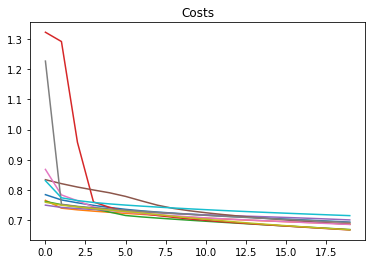


average accuracy is : 42.8



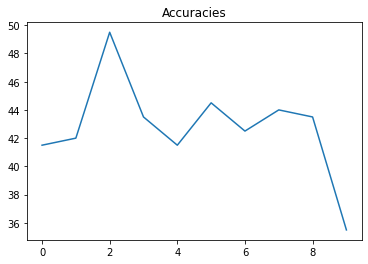


Time : 0:00:14.043184


In [ ]:
# Vectorization
from datetime import datetime

accuracies = []
tot_costs = []
num_of_train = 200
epochs = 20
   
def vectorization (x_set,num_set):
  global train_data

  w0 = np.random.normal(size=(16,1024))
  w1 = np.random.normal(size=(16, 16))
  w2 = np.random.normal(size=(4, 16))
  
  b0 = np.zeros((16, 1))
  b1 = np.zeros((16, 1))
  b2 = np.zeros((4, 1))
  
  costs = []
  avg_cost=0
  batch_size = 16
  batch_num = 20 // 16
  learning_rate = 0.3

  for epoch in range(epochs):
      
      all_batches = []
      for x in range(0, num_of_train, batch_size) :
          end=x+batch_size
          all_batches.append(train_set[x:end])

      for ba in all_batches:
          # initialize gradians for weights and bias off all layers
          g_w0 = np.zeros((16, 1024))
          g_w1 = np.zeros((16, 16))
          g_w2 = np.zeros((4, 16))
          g_b0 = np.zeros((16, 1))
          g_b1 = np.zeros((16, 1))
          g_b2 = np.zeros((4, 1))
          
          for _img, label in ba:
              
              a1 = sigmoid(w0 @ _img + b0)
              a2 = sigmoid(w1 @ a1 + b1)
              a3 = sigmoid(w2 @ a2 + b2)

              # last layer weight
              g_w2 += 2 * (a3 - label) * a3 * (1 - a3) @ np.transpose(a2)
              
              # last layer bias
              g_b2 += 2 * (a3 - label) * a3 * (1 - a3)


              # 3rd layer activation
              da2 = np.zeros((16, 1))
              da2 += np.transpose(w2) @ (2 * (a3 - label) * (a3 * (1 - a3)))                

              # 3rd layer weight
              g_w1 += ( a2 * (1 - a2) *da2) @ np.transpose(a1)
              
              #3rd layer bias
              g_b1 += da2 * a2* (1 - a2)
              
              #  2nd layer 
              da1 = np.zeros((16, 1))
              da1 +=   np.transpose(w1) @ (da2 * a2 * (1 - a2))
              g_w0 += (da1 * a1* (1 - a1) ) @ np.transpose(_img)
              g_b0 += da1 * a1* (1 - a1)

          # update weights and biases          
          w2 = w2 - (learning_rate * (g_w2 / batch_size))
          w1 = w1 - (learning_rate * (g_w1 / batch_size))
          w0 = w0 - (learning_rate * (g_w0 / batch_size))
          
          b2 = b2 - (learning_rate * (g_b2 / batch_size))
          b1 = b1 - (learning_rate * (g_b1 / batch_size))
          b0 = b0 - (learning_rate * (g_b0 / batch_size))
      
      # calculate costs
      cost = 0
      for train_data in x_set[:num_set]:
          a0 = train_data[0]
          a1 = sigmoid(w0 @ a0 + b0)
          a2 = sigmoid(w1 @ a1 + b1)
          a3 = sigmoid(w2 @ a2 + b2)

          for j in range(4):
              cost += np.power((a3[j, 0] - train_data[1][j,  0]), 2)
              
      cost /= num_of_train
      costs.append(cost)
  avg_cost = sum(costs)/len(costs)
  plt.plot(costs)
  
  # feed forward to calculate accuracies
  counter2 = 0

  for train_data in x_set[:num_set]:
      a0 = train_data[0]
      a1 = sigmoid(w0 @ a0 + b0)
      a2 = sigmoid(w1 @ a1 + b1)
      a3 = sigmoid(w2 @ a2 + b2)
      
      index = np.argmax(a3)
      res = np.argmax(train_data[1])
      
      if index == res:
          counter2+= 1

  accuracies.append(counter2*100/num_set)
  tot_costs.append(avg_cost)

start_time = datetime.now()
for i in range(10):
  vectorization(train_set,200)
end_time = datetime.now()

plt.title("Costs")
plt.show()
print("\naverage accuracy is : " + str(sum(accuracies)/10)+"\n")
plt.plot(accuracies)
plt.title("Accuracies")
plt.show()
print('\nTime : ' + str(end_time - start_time))


#Testing our NN

In this cell we test our NN with 8000 images for train

First we test our NN wth train images and then we test it with test images

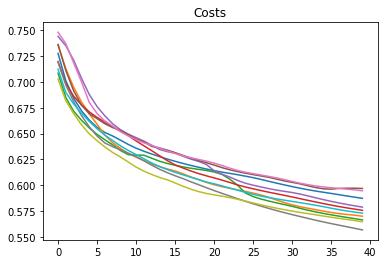


average accuracy is : 54.88625%



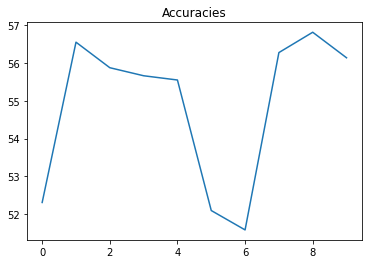


Time : 0:19:44.359936


In [ ]:
accuracies = []
tot_costs = []
num_of_train = 8000
epochs = 40


start_time = datetime.now()
for i in range(10):
  vectorization(train_set,8000)
end_time = datetime.now()

plt.title("Costs")
plt.show()
print("\naverage accuracy is : " + str(sum(accuracies)/10)+"%\n")
plt.plot(accuracies)
plt.title("Accuracies")
plt.show()
print('\nTime : ' + str(end_time - start_time))


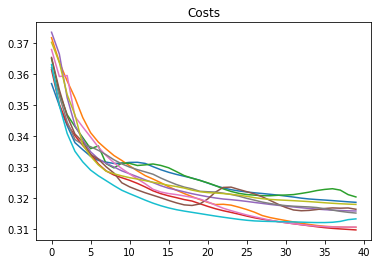


average accuracy is : 49.625%



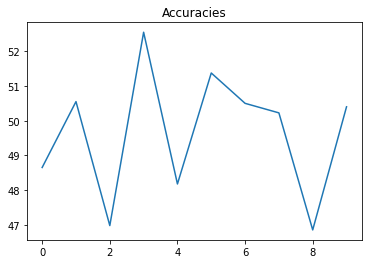


Time : 0:15:56.756854


In [ ]:
accuracies = []
tot_costs = []
num_of_train = 8000
epochs = 40


start_time = datetime.now()
for i in range(10):
  vectorization(test_set,4000)
end_time = datetime.now()

plt.title("Costs")
plt.show()
print("\naverage accuracy is : " + str(sum(accuracies)/10)+"%\n")
plt.plot(accuracies)
plt.title("Accuracies")
plt.show()
print('\nTime : ' + str(end_time - start_time))
